In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

/Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/jeongsarah/opt/anaconda3/envs/python-env/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

In [5]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, 
                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 41s 5ms/sample - loss: 2.5881 - accuracy: 0.3410 - val_loss: 2.2262 - val_accuracy: 0.4826
Epoch 2/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 2.0125 - accuracy: 0.4839 - val_loss: 1.8523 - val_accuracy: 0.5285
Epoch 3/20
8982/8982 [==============================] - 52s 6ms/sample - loss: 1.7626 - accuracy: 0.5432 - val_loss: 1.7563 - val_accuracy: 0.5454
Epoch 4/20
8982/8982 [==============================] - 47s 5ms/sample - loss: 1.6931 - accuracy: 0.5613 - val_loss: 1.8302 - val_accuracy: 0.5214
Epoch 5/20
8982/8982 [==============================] - 47s 5ms/sample - loss: 1.6143 - accuracy: 0.5866 - val_loss: 1.5936 - val_accuracy: 0.5971
Epoch 6/20
8982/8982 [==============================] - 47s 5ms/sample - loss: 1.4826 - accuracy: 0.6180 - val_loss: 1.5143 - val_accuracy: 0.6207
Epoch 7/20
8982/8982 [==============================] - 48s 5ms/sample

In [9]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

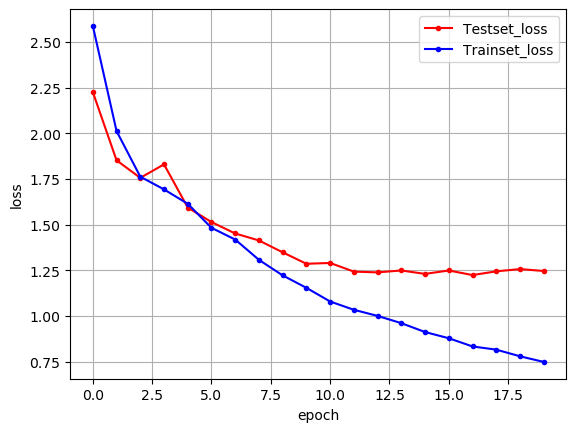

In [11]:
y_vloss = history. history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

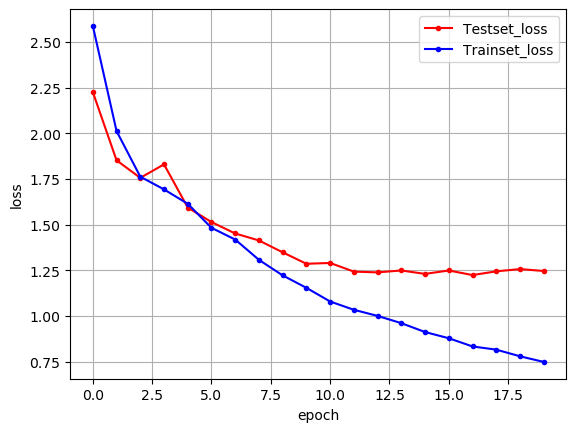

In [11]:
y_vloss = history. history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()